<B>Purpose</B>: This notebook evaluates the effects of 1) crowding, 2) polydisperity, and 3) closed boundaries on the distribution of collisions between ribosomes and tRNA in 100ms given biologically expected ratios of molecules as calculated in 04172018_tRNAModelCalculations.xlsx

<B>Conclusion</B>: Simulations demonstrates that polydisperse crowding (as opposed to monodisperse crowding or dilute polydisperity) and closed boundaries are each independently important for creating non-uniform tRNA-ribosome interactions (at the time scale tested, 100ms).

In [57]:
from src import analysis_utils as utils
import matplotlib.pyplot as plt
import numpy as np
import pickle as pkl
import seaborn as sns; sns.set()
%matplotlib inline 
%load_ext autoreload
%autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
def plotAnalysis(path):
    with open(path, 'rb') as f:
        tRNACollisionCount_rt,incorrectCollisions_rt =pkl.load(f)

    fig, ax = plt.subplots(2,1)

    for i in range(3):
        ax[0].bar(.1*i+np.arange(0,7),tRNACollisionCount_rt[0:7,i], width=0.1, label="tRNA "+str(i))

    ax[0].set_title("# times ribosome sampled by a given tRNA")
    ax[0].set_xlabel("Ribosome ID #")
    ax[0].set_xticklabels(["0","r0","r1","r2","r3","r4","r5","r6"])
    ax[0].set_ylabel("# collision events")

    ax[1].hist(incorrectCollisions_rt[0],bins=10,range=(1,1000)) #expt 11
    ax[1].set_title("Distribution of incorrect tRNA collisions per correct tRNA\n collision for given ribosome")
    ax[1].set_xlabel("# of other tRNA collisions with a given ribosome before specified collision (binned)")
    ax[1].set_ylabel("# of times")

    plt.tight_layout(pad=0.1, w_pad=2, h_pad=1)

    ax[0].legend(loc=(1.04,-0.8))

<B> Experiment 18: Negative control </B>, 47 tRNAEFTu, 7 ribosomes, 0 tRNAsynth, 0 aa, 85nm side (phi=~0.22). 
No collisions between tRNA-tRNA, ribosome-ribosome, and tRNA-ribosome (free diffusion with no volume exclusion) using an effective diffusion coefficient for tRNA-efTu (43 diffusion). Shown at 3 different time scales (1ms, 10ms, 100ms)

Initial ribosome x tRNA x collisionGapNumber has shape: (7, 5, 0)
Currently processing ribosome # 0
Currently processing ribosome # 1
Currently processing ribosome # 2
Currently processing ribosome # 3
Currently processing ribosome # 4
Currently processing ribosome # 5
Currently processing ribosome # 6


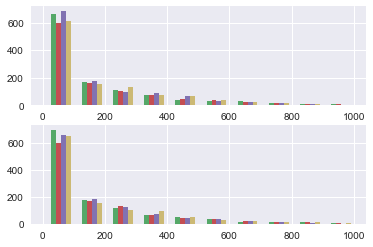

In [62]:
expt18_df=utils.readSimData("data/expt18_47tRNAEfTu_7ribosome_0tRNASynth_0aa_43nmSidelength_20180426.xls")
expt18_df_incorr=utils.countIncorrectRibosomeCollisions(expt18_df,np.arange(0,5),np.arange(48,55));
fig,ax=plt.subplots(2,1)
ax[0].hist(expt18_df_incorr[0],bins=10,range=(1,1000));
ax[1].hist(expt18_df_incorr[3],bins=10,range=(1,1000));

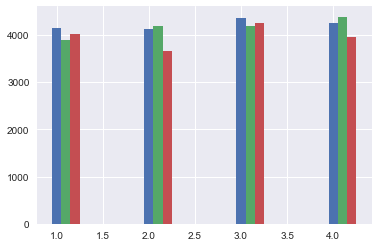

In [80]:
expt18_collisions=utils.countRibosomeCollisions(expt18_df,np.arange(1,5),np.arange(48,55))
for i in range(3):
    plt.bar(.1*i+np.arange(1,5),expt18_collisions[1:5,i], width=0.1, label="tRNA "+str(i))

<B>What are the effects of crowding on collisions (with minimal polydisperity)?</B>

<B>Experiment 5</B>: 47 tRNAEFTu, 7 ribosomes, 0 tRNAsynth, 0 aa, 85nm side (phi=~0.22)

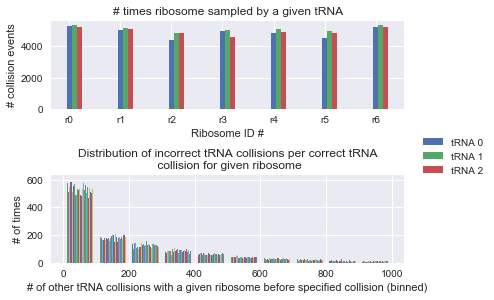

In [7]:
plotAnalysis("data/expt5_47tRNAEfTu_1ribosome_0tRNASynth_0aa_1000nmSidelength_20180424.p")

<B>Experiment 6</B>: 94 tRNAEFTu, 14 ribosomes, 0 tRNAsynth, 0 aa, 85nm side (phi=~0.44)

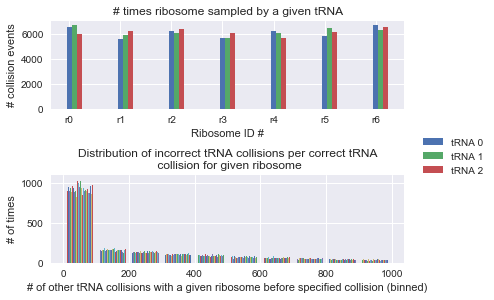

In [8]:
plotAnalysis("data/expt6_94tRNAEfTu_14ribosome_0tRNASynth_0aa_85nmSidelength_20180424.p")

<B>What are the effects of closed boundaries on collisions (with minimal polydisperity)?</B>

<B>Experiment 7</B>: 47 tRNAEFTu, 7 ribosomes, 0 tRNAsynth, 0 aa, 85nm side (phi=~0.22); Closed boundary

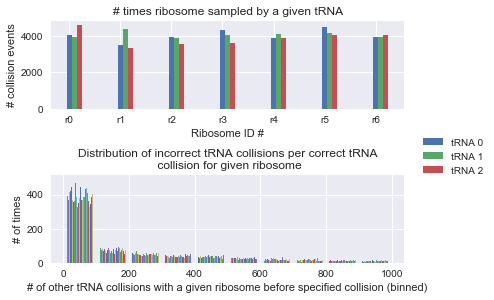

In [13]:
plotAnalysis("data/expt7_47tRNAEfTu_7ribosome_0tRNASynth_0aa_85nmSidelength_20180424.p")

<B>Experiment 8</B>: 94 tRNAEFTu, 14 ribosomes, 0 tRNAsynth, 0 aa, 85nm side (phi=~0.44); Closed boundary

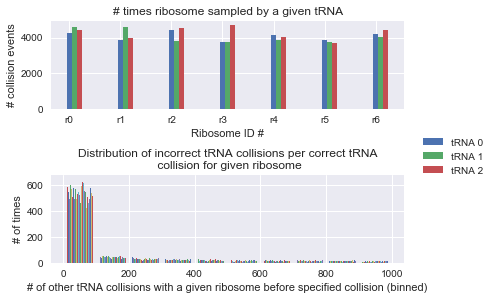

In [25]:
plotAnalysis("data/expt8_94tRNAEfTu_14ribosome_0tRNASynth_0aa_85nmSidelength_20180424.p")

<B>What are the effects of polydisperity on collisions?</B>

<B>Experiment 9</B>: 47 tRNAEFTu, 7 ribosomes, 0 tRNAsynth, 863 aa, 85nm side (phi=~0.22)

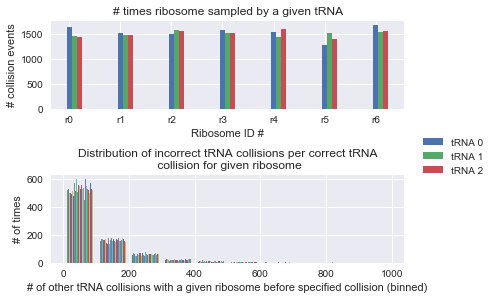

In [14]:
plotAnalysis("data/expt9_47tRNAEfTu_7ribosome_0tRNASynth_863aa_85nmSidelength_20180424.p")

<B>Experiment 10</B>: 47 tRNAEFTu, 7 ribosomes, 8 tRNAsynth, 863 aa, 85nm side (phi=~0.22)

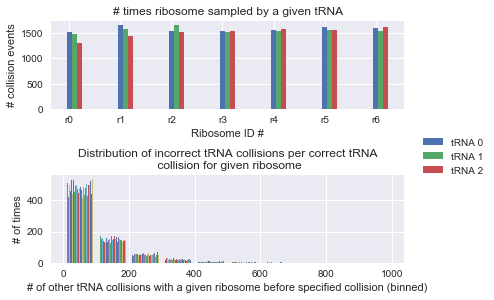

In [15]:
plotAnalysis("data/expt10_47tRNAEfTu_7ribosome_8tRNASynth_863aa_85nmSidelength_20180424.p")

<B>Experiment 11</B>: 94 tRNAEFTu, 14 ribosomes, 16 tRNAsynth, 1726 aa, 85nm side (phi=~0.44). 

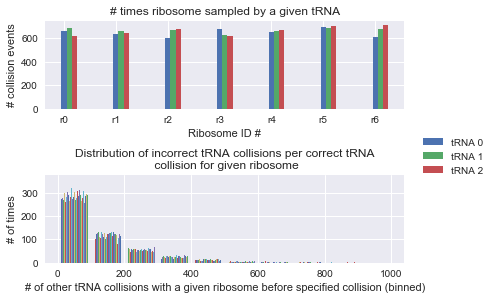

In [19]:
plotAnalysis("data/expt11_94tRNAEfTu_14ribosome_16tRNASynth_1726aa_85nmSidelength_20180424.p")

<B> What are the joint effects of polydisperity & closed boundaries in uncrowded & crowded systems? </B>
<B>Experiment 12</B>: 47 tRNAEFTu, 7 ribosomes, 8 tRNAsynth, 863 aa, 85nm side (phi=~0.22). Closed boundary

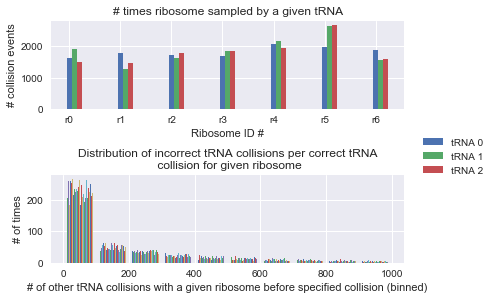

In [16]:
plotAnalysis("data/expt12_47tRNAEfTu_7ribosome_8tRNASynth_863aa_85nmSidelength_20180424.p")

<B>Experiment 13</B>: 94 tRNAEFTu, 14 ribosomes, 16 tRNAsynth, 1726 aa, 85nm side (phi=~0.44).  Closed boundary

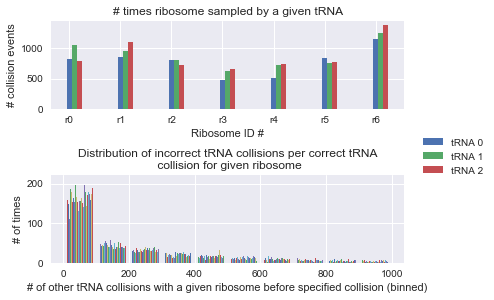

In [20]:
plotAnalysis("data/expt13_94tRNAEfTu_14ribosome_16tRNASynth_1726aa_85nmSidelength_20180424.p")

In [ ]:
<B>Experiment 14</B>: 94 tRNAEFTu, 14 ribosomes, 16 tRNAsynth, 1726 aa, 85nm side (phi=~0.44).  Closed boundary

In [ ]:
#Conclusion: CLosing boundaries w/ polydisperity seems to have a significant effect on changing which tRNAs collide with which ribosomes. However, neither polydisperity or crowding alone has this effect.

In [8]:
#Interesting conclusion: polydisperity reduces total # of collisions between tRNA and ribosomes (expt 13 vs expt 8)

In [ ]:
#Can check if poisson process by making the other tRNA species 10x more likely